In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [6]:
data = pd.read_csv("train.csv")

In [7]:
data.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [8]:
df = data.copy()

In [9]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
df.drop(columns=['Unnamed: 0','Booking_ID'], inplace=True)

In [11]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [12]:
df.shape

(29020, 18)

In [13]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(7661)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(21359, 18)

### Univariate analysis

In [17]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [19]:
df['no_of_adults'].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [20]:
df['no_of_children'].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [21]:
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

In [31]:
df['booking_status'].value_counts()

### Imbalance Dataset

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [30]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [47]:
cat_cols = df.select_dtypes('O').columns
cat_cols = cat_cols.to_list()
num_cols = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [49]:
cat_cols.extend(['required_car_parking_space','repeated_guest','booking_status'])

In [157]:
cat_cols.remove('booking_status')
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'required_car_parking_space',
 'repeated_guest']

In [51]:
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [56]:
print(len(num_cols)+len(cat_cols))

18


In [57]:
len(df.columns)

18

### EDA 

In [58]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [59]:
## Univariate analysis

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
def num_plot_dist(df,num_of_features):
    fig,axes = plt.subplots(len(num_of_features),2,figsize=(15,len(num_of_features)*5))
    if len(num_of_features)==1:
        axes = [axes]
    for i, column in enumerate(num_of_features):
        sns.histplot(data= df, x=column,ax=axes[i][0],kde = True,palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")
        sns.boxplot(data=df,x=column,ax=axes[i][1],palette="Blues")
        axes[i][1].set_title(f"Box plot for {column}")
    
    plt.tight_layout()
    plt.show()



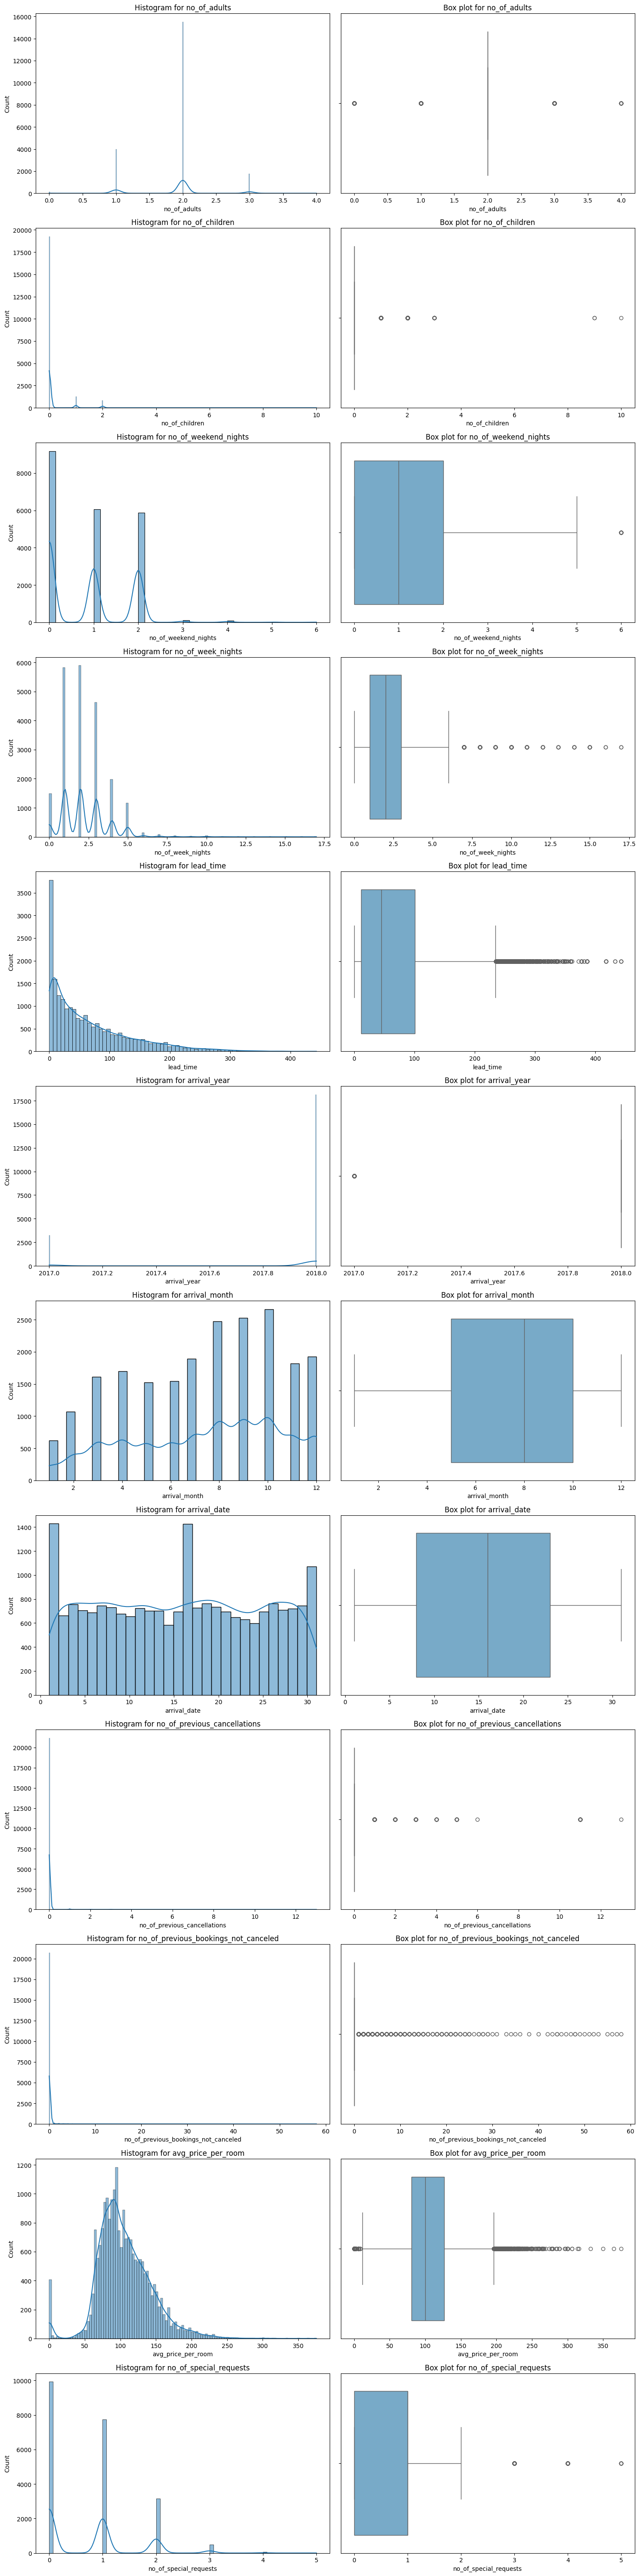

In [73]:
num_plot_dist(df, num_cols)

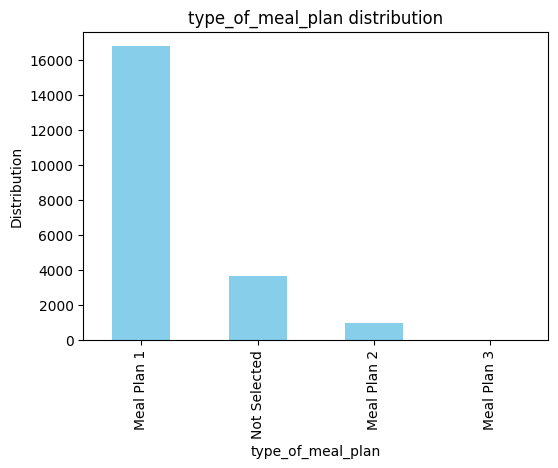

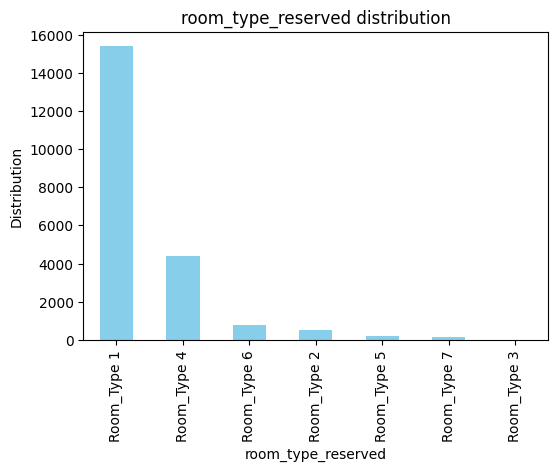

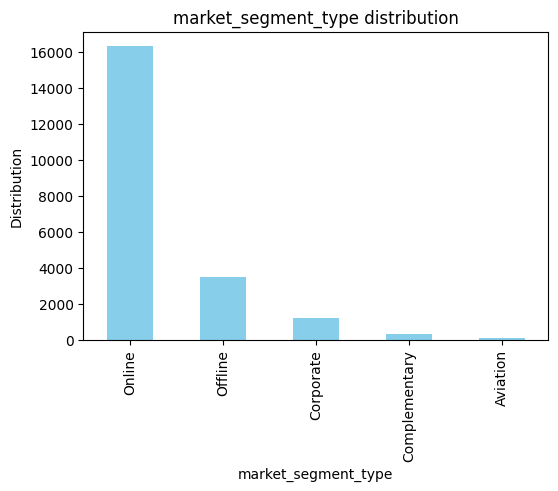

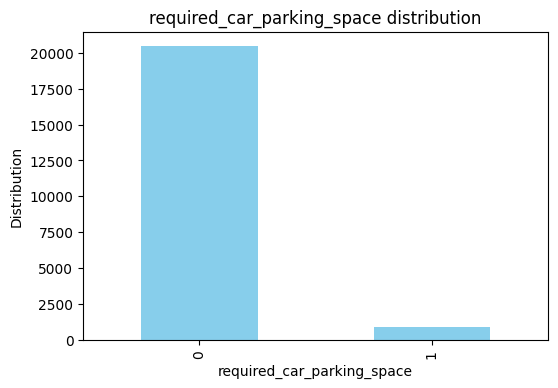

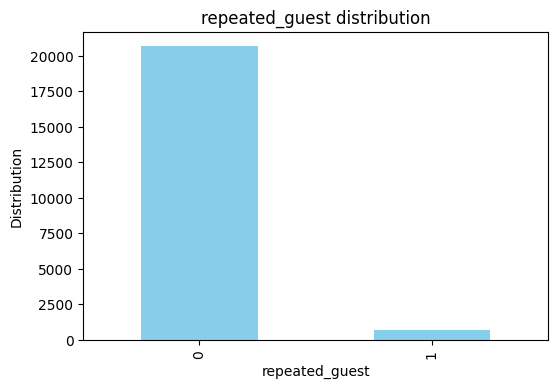

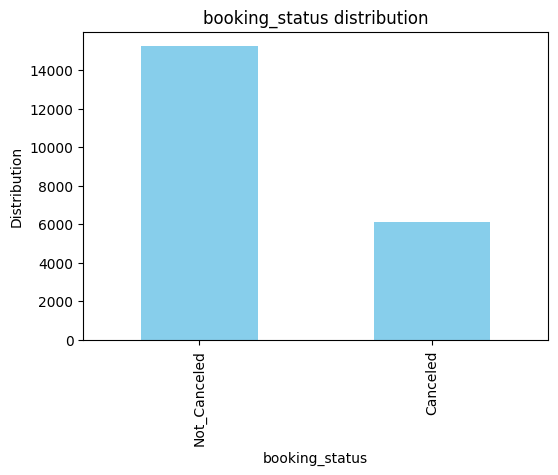

In [78]:
### Univariate for cat cat_cols

for cat_feature in cat_cols:
    plt.figure(figsize=(6,4))
    df[cat_feature].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f"{cat_feature} distribution")
    plt.xlabel(f"{cat_feature}")
    plt.ylabel(f'Distribution')

In [79]:
## Bivariate Analysis

def plot_bivariate_for_num_cols(df,target_col,num_features):
    num_plots = (len(num_features))
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target_col,y=column,ax=axes[i],data=df,palette="Blues")
        axes[i].set_title(f"{column} vs {target_col}")
    
    plt.tight_layout()
    plt.show()



In [82]:
num_cols
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'required_car_parking_space',
 'repeated_guest',
 'booking_status']

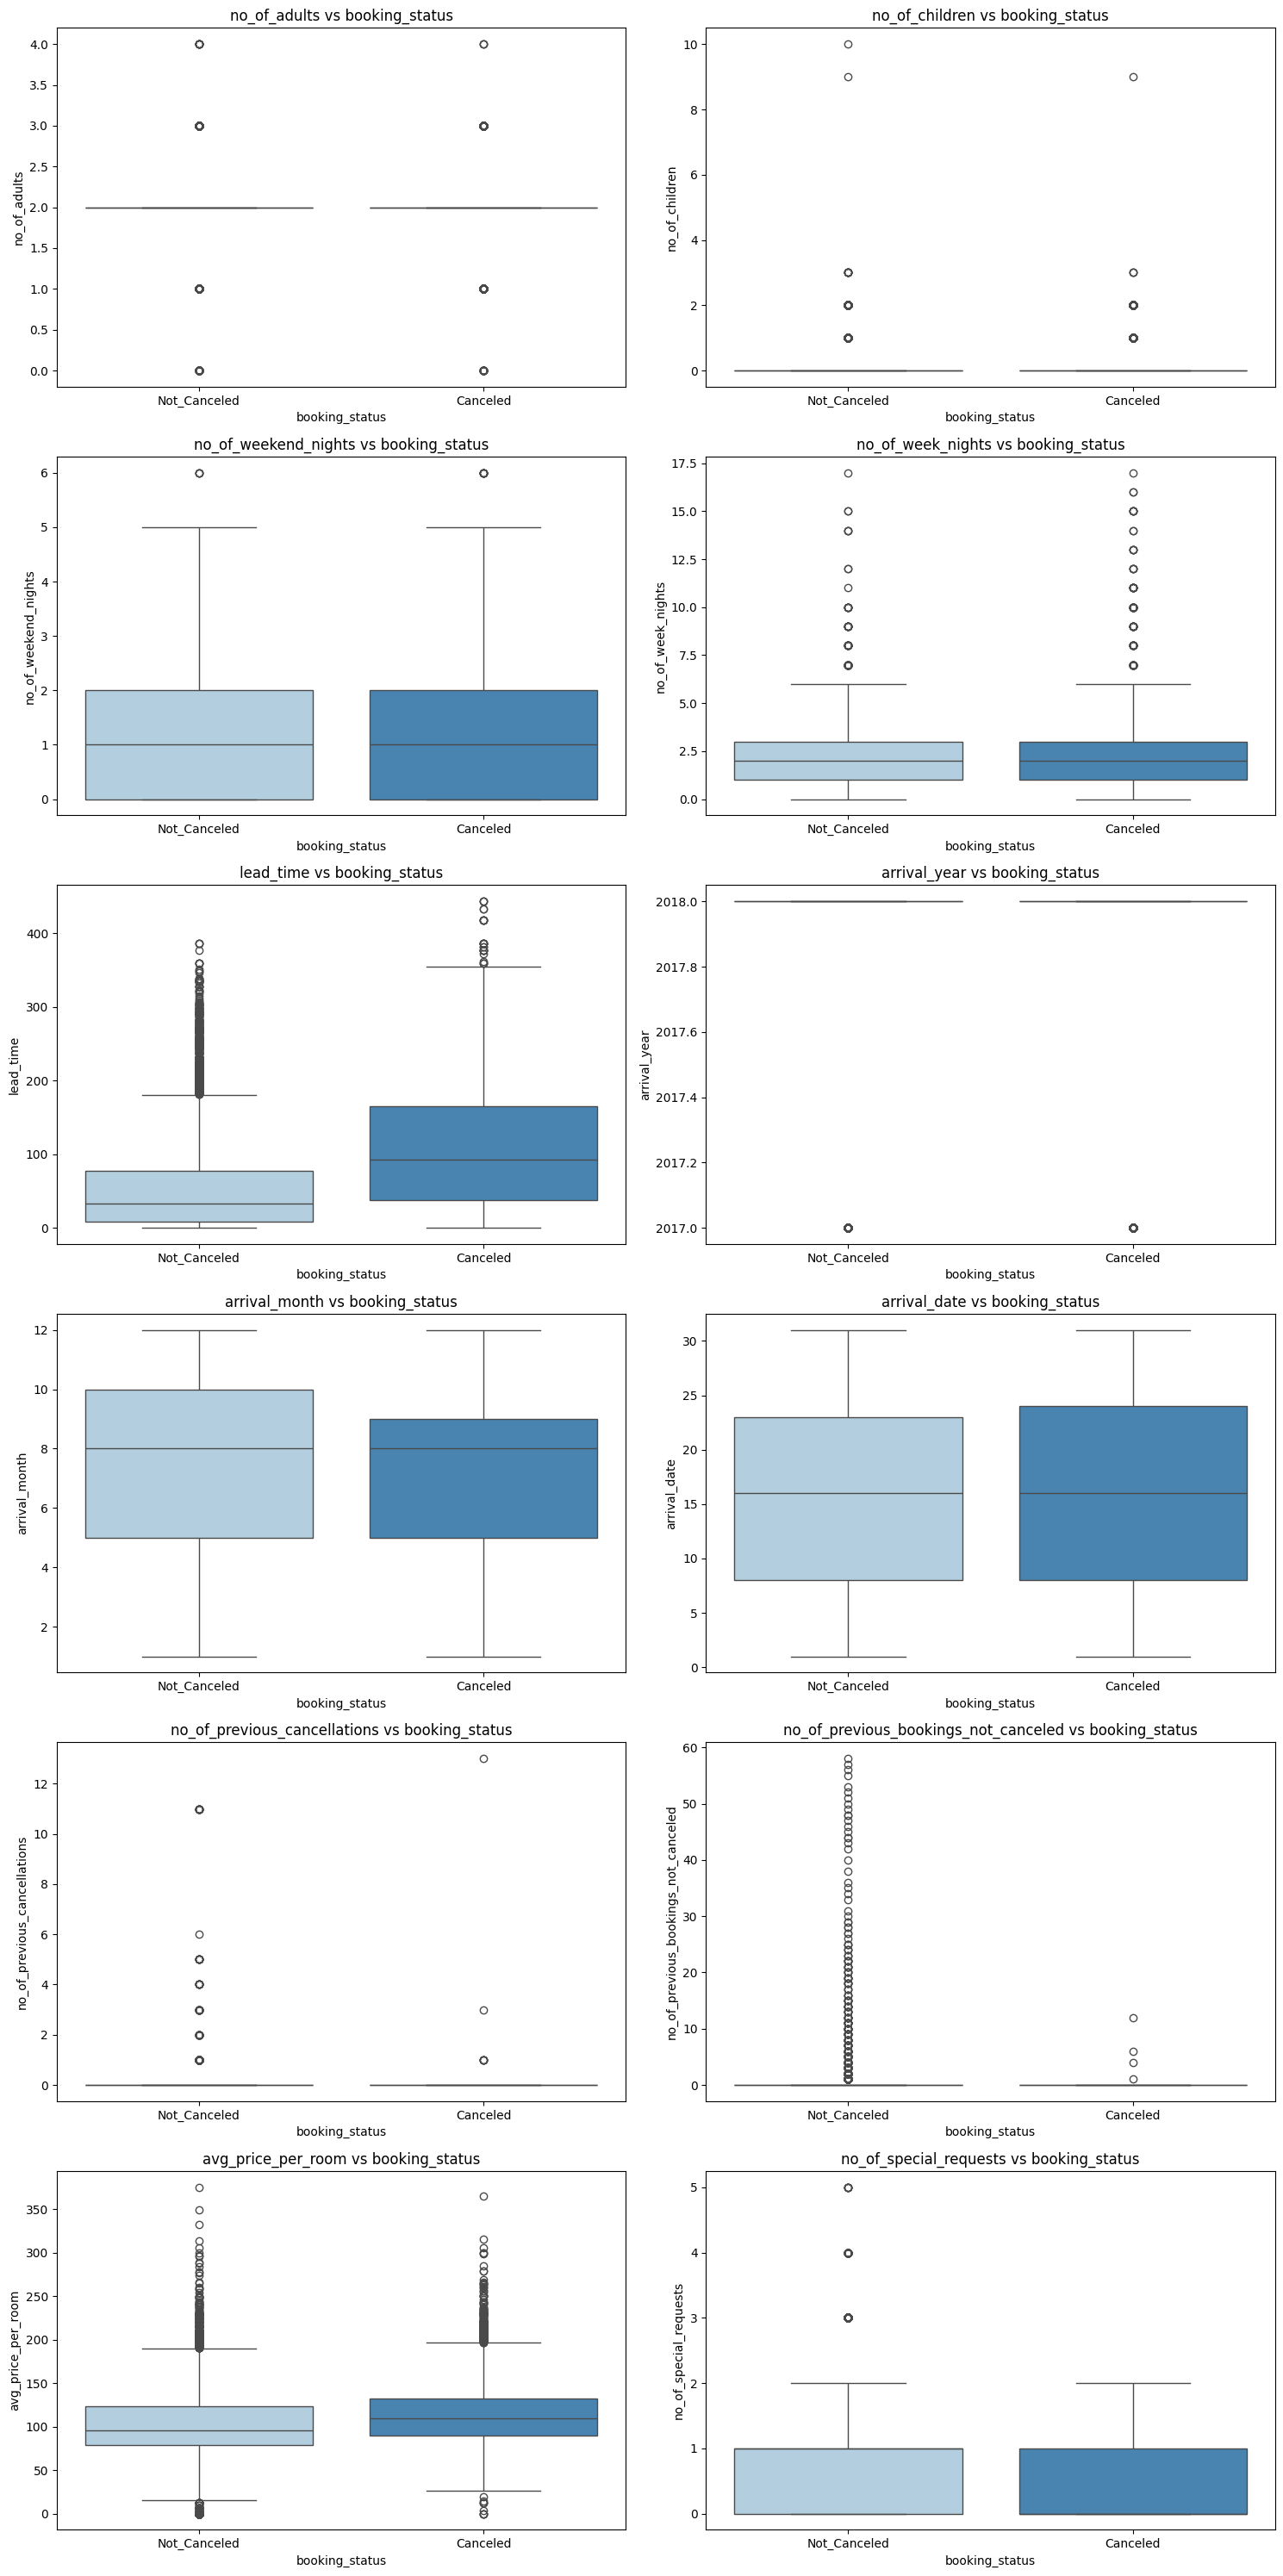

In [83]:
plot_bivariate_for_num_cols(df,"booking_status",num_cols)

In [84]:
### DAta Processing

In [85]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [87]:
### Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

mappings = {}
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    mappings[col] = {label:value for label,value in zip(le.classes_,le.transform(le.classes_))}
    

In [88]:
mappings


{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [89]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [93]:
### Multicolinearity

!pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.5 MB 5.0 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.5 MB 4.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.5 MB 4.1 MB/s eta 0:00:02
   ------------- -------------------------- 3.1/9.5 MB 3.8 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.5 MB 3.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.5 MB 4.0 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.5 MB 3.9 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.5 MB 3.7 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.5 MB 3.5 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.5 MB 3.4 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.5 MB 3.2 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.5 MB 3.1 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [99]:
len(df.columns)

18

In [101]:
X = add_constant(df)
vif_data = pd.DataFrame()
vif_data['features'] = df.columns
vif_data.shape

(18, 1)

In [106]:
vif_data["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

In [107]:
vif_data

,features,VIF
0,no_of_adults,18.403554
1,no_of_children,1.397605
2,no_of_weekend_nights,2.127159
3,no_of_week_nights,3.673729
4,type_of_meal_plan,1.429036
5,required_car_parking_space,1.082035
6,room_type_reserved,2.076494
7,lead_time,2.585531
8,arrival_year,68.712010
9,arrival_month,6.919097


In [108]:
corr = df.corr()

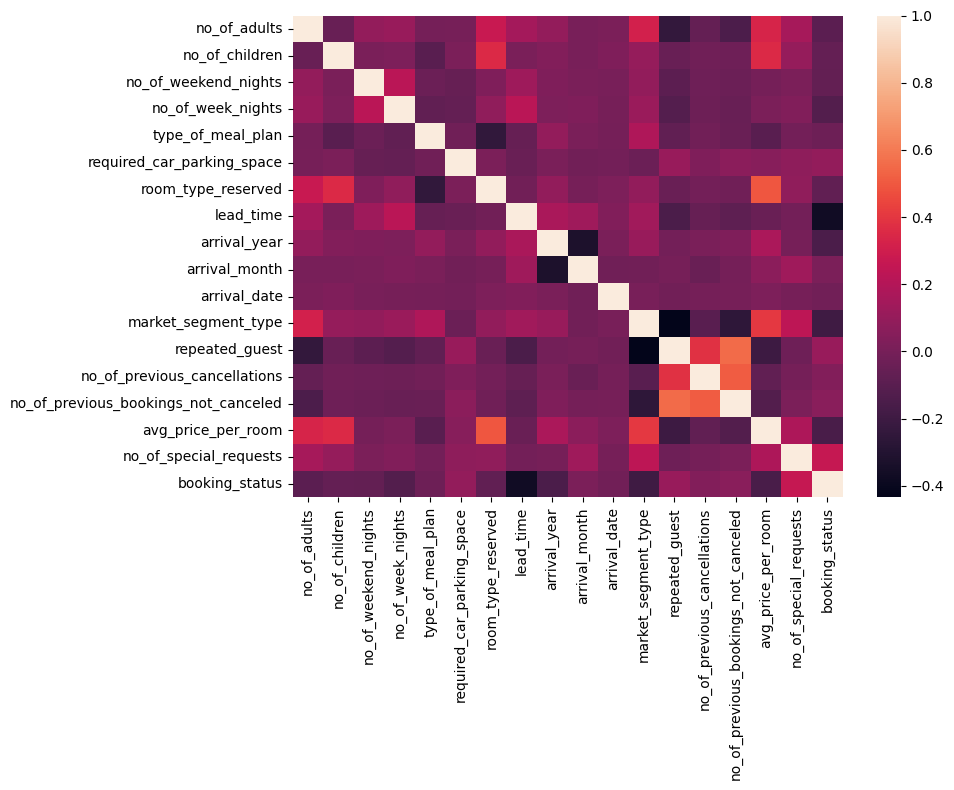

In [113]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)
plt.tight_layout()

### skewness

In [115]:
df.skew()

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [116]:
for col in df.columns:
    if df[col].skew() > 5:
        df[col] = np.log1p(df[col])

In [117]:
df.skew()

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

## Handle Imbalance data

In [119]:
df.booking_status.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [120]:
X = df.drop(columns=["booking_status"])
y = df.booking_status

In [121]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29012,3,0,0,1,0,0,3,65,2018,6,21,4,0.0,0.0,0.0,132.30,0
29013,2,0,2,3,0,0,0,86,2018,6,17,4,0.0,0.0,0.0,126.90,1
29014,2,0,0,2,0,0,3,0,2018,10,12,4,0.0,0.0,0.0,139.50,1
29015,2,0,2,2,0,0,0,43,2017,12,26,3,0.0,0.0,0.0,55.00,2


In [122]:
y

0        1
1        1
2        0
3        1
4        0
        ..
29012    0
29013    1
29014    1
29015    1
29019    1
Name: booking_status, Length: 21359, dtype: int64

In [123]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [125]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

In [126]:
x_res, y_res = smote.fit_resample(X,y)

In [127]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [128]:
y_res

0        1
1        1
2        0
3        1
4        0
        ..
30457    0
30458    0
30459    0
30460    0
30461    0
Name: booking_status, Length: 30462, dtype: int64

In [129]:
x_res

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,2,0,0,2,1,0,0,265,2018,6,24,3,0.0,0.0,0.0,111.037207,0
30458,1,0,1,3,0,0,0,103,2018,4,18,3,0.0,0.0,0.0,72.250000,0
30459,2,0,1,2,1,0,0,27,2018,6,12,4,0.0,0.0,0.0,104.556265,0
30460,1,0,1,1,3,0,0,46,2018,4,4,4,0.0,0.0,0.0,107.100000,0


In [130]:
df.shape

(21359, 18)

In [131]:
## create a balanced df 
balanced_df = pd.DataFrame(x_res,columns=X.columns)
balanced_df['booking_status'] = y_res

In [132]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [133]:
balanced_df.shape

(30462, 18)

In [134]:
df_1 = balanced_df.copy()

In [135]:
df_1.shape

(30462, 18)

In [136]:
### Feature selection
len(df_1.columns)

18

In [137]:
### Random forest Feature importance

from sklearn.ensemble import RandomForestClassifier

X = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1]

In [138]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [139]:
feature_importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({"features":X.columns,"importance":feature_importance})

In [142]:
top_imp_feature_df = feature_importance_df.sort_values(by='importance',ascending=False)

In [143]:
len(df_1.columns)

18

In [144]:
top_10_features = top_imp_feature_df.features.head(10).values

In [146]:
top_10_df = df_1[top_10_features.tolist()+ ['booking_status']]

In [147]:
top_10_df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.000000,10,17,4,1,2,0,0,1
1,98,2,121.500000,7,16,4,1,1,0,0,1
2,433,0,70.000000,9,8,3,3,0,0,0,0
3,195,0,72.250000,8,8,3,5,2,0,0,1
4,188,0,130.000000,6,15,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30457,265,0,111.037207,6,24,3,2,0,1,0,0
30458,103,0,72.250000,4,18,3,3,1,0,0,0
30459,27,0,104.556265,6,12,4,2,1,1,0,0
30460,46,0,107.100000,4,4,4,1,1,3,0,0


In [148]:
df = df_1.copy()

In [149]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 5.0 MB/s eta 0:00:15
    --------------------------------------- 1.6/72.0 MB 4.4 MB/s eta 0:00:16
   - -------------------------------------- 2.6/72.0 MB 4.2 MB/s eta 0:00:17
   - -------------------------------------- 3.1/72.0 MB 4.1 MB/s eta 0:00:17
   -- ------------------------------------- 3.9/72.0 MB 3.9 MB/s eta 0:00:18
   -- ------------------------------------- 4.5/72.0 MB 3.7 MB/s eta 0:00:19
   -- ------------------------------------- 4.7/72.0 MB 3.5 MB/s eta 0:00:20
   -- ------------------------------------- 5.2/72.0 MB 3.2 MB/s eta 0:00:21
   --- ------------------------------------ 5.8/72.0 MB 3.1 MB/s eta 0:00:22
   --- ------------------------------------ 6.3/72.0 MB 3.0 MB/s eta 0:00:22
   ---- ----------------------------------- 7.3/72.0 MB 3.1 MB/s eta 0:00:21
   ---- ----------------------------------- 7.9/72.0 MB 3.2 MB/s eta 0:00:21
   ---


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score, classification_report,f1_score
from sklearn.svm import SVC

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [153]:
clasifiers = {
    "Random Forest":RandomForestClassifier(random_state=42),
    "Logistic Reg":LogisticRegression(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "SVC":SVC(random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "KNN":KNeighborsClassifier(),
    "NAive Bayes": GaussianNB(),
    "XGBoost":XGBClassifier(),
    "Light GBM":LGBMClassifier(random_state=42)
}

metrics = {
    "Models":[],
    "Accuracy":[],
    "Precision":[],
    "Recall":[],
    "F1 Score":[]
}

In [154]:
for model_name, model in  clasifiers.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    metrics["Models"].append(model_name)
    metrics["Accuracy"].append(acc_score)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

In [155]:
metrcis_df = pd.DataFrame(metrics)

In [156]:
metrcis_df

,Models,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.897259,0.896753,0.899674,0.898211
1,Logistic Reg,0.786148,0.797575,0.771336,0.784236
2,Gradient Boosting,0.844247,0.828837,0.870684,0.849245
3,Adaboost,0.799442,0.808205,0.789251,0.798616
4,SVC,0.665682,0.641391,0.763192,0.697010
5,DecisionTreeClassifier,0.844412,0.853196,0.834853,0.843925
6,KNN,0.779419,0.857794,0.673941,0.754834
7,NAive Bayes,0.577056,0.906096,0.179153,0.299157
8,XGBoost,0.887904,0.882655,0.896743,0.889643
9,Light GBM,0.876416,0.864194,0.895440,0.879539


In [ ]:
### Lets Train RF Model 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
